## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Read the data file and review the dataframe

In [2]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## General info about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Check the missing values in the dataset

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Data Cleaning

### Re-format the type of the 'date' column

In [5]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

datetime64[ns]


### Create a new column 'yr_sold' from 'date' column

Extracting the year from the 'date' column and put it into a new column 'yr_sold' to indicate the year that the house was sold

In [6]:
df['yr_sold'] = pd.DatetimeIndex(df['date']).year

Drop the original 'date' column 

In [7]:
df = df.drop('date', axis=1).copy()
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015


### Deal with missing values

In [8]:
# Summarizing the data values in 'waterfront' column
df.groupby(by = 'waterfront')['waterfront'].count().sort_values(ascending = False)

waterfront
0.0    19075
1.0      146
Name: waterfront, dtype: int64

About 88% of data in 'waterfront' column has a value of 0 (means that the house has no waterfront view). The NaN values are about 11% of the column data. Therefore, the missing values in 'waterfront' column are replaced with the value of 0. 

In [9]:
# Replace NaN with 0.0 and check the missing values again
df['waterfront'] = df['waterfront'].fillna(0.0)
df['waterfront'].isna().sum()

0

In [10]:
# Summarizing the data values in 'view' column
df.groupby(by = 'view')['view'].count().sort_values(ascending = False)

view
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Most of the values (about 90%) in 'view' column are 0.0  and the missing values are only 0.29% of the column data. Therefore, the NaN values in this column are replaced with 0.0 

In [11]:
# Replace NaN with 0.0 and check the missing values again
df['view'] = df['view'].fillna(0.0)
df['view'].isna().sum()

0

In [12]:
# Summarizing the data values in 'yr_renovated' column
df.groupby(by = 'yr_renovated')['yr_renovated'].count().sort_values(ascending = False)

yr_renovated
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1954.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 70, dtype: int64

Most of the values (about 79%) in the 'yr_renovated' columns are 0.0 which means that the renovated year for most of the houses are unknown. Therefore, it is best to drop the column as replacing NaN with the median of the coumn is useless.

In [13]:
df = df.drop('yr_renovated', axis=1).copy()

In [14]:
# Summarizing the data values in 'sqft_basement' column
df.groupby(by = 'sqft_basement')['sqft_basement'].count().sort_values(ascending = False)

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2360.0        1
2350.0        1
2310.0        1
2300.0        1
2190.0        1
Name: sqft_basement, Length: 304, dtype: int64

More than half of the values (~59%) in 'sqft_basement' column is 0.0 which means no basement and only 2% of the data is unknown as indicated as '?'. Since the majority of the data is 0.0 or unknown ('?'), it is best to change this data into a binary data: 0 for no basement and 1 for having a basement. 

In [15]:
# Replace unknown values in 'sqft_basement' with 0
df['sqft_basement'][df['sqft_basement']== '?'] = '0.0'

# Replace the non-zero values with 1
df['sqft_basement'][df['sqft_basement']!= '0.0'] = 1

# Rename the 'sqft_basement' to 'basement'
df = df.rename(columns={'sqft_basement':'basement'}).copy()
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1,1951,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1,1965,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,2015


In [16]:
# Change the datatype of 'basement' column
from numpy import float64
df['basement'] = df['basement'].astype(str).astype('float64')

In [17]:
# Summarizing the data values in 'sqft_basement2' column
df.groupby(by = 'basement')['basement'].count().sort_values(ascending = False)

basement
0.0    13280
1.0     8317
Name: basement, dtype: int64

Check the dataset general information and missing values again

In [18]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  basement       21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

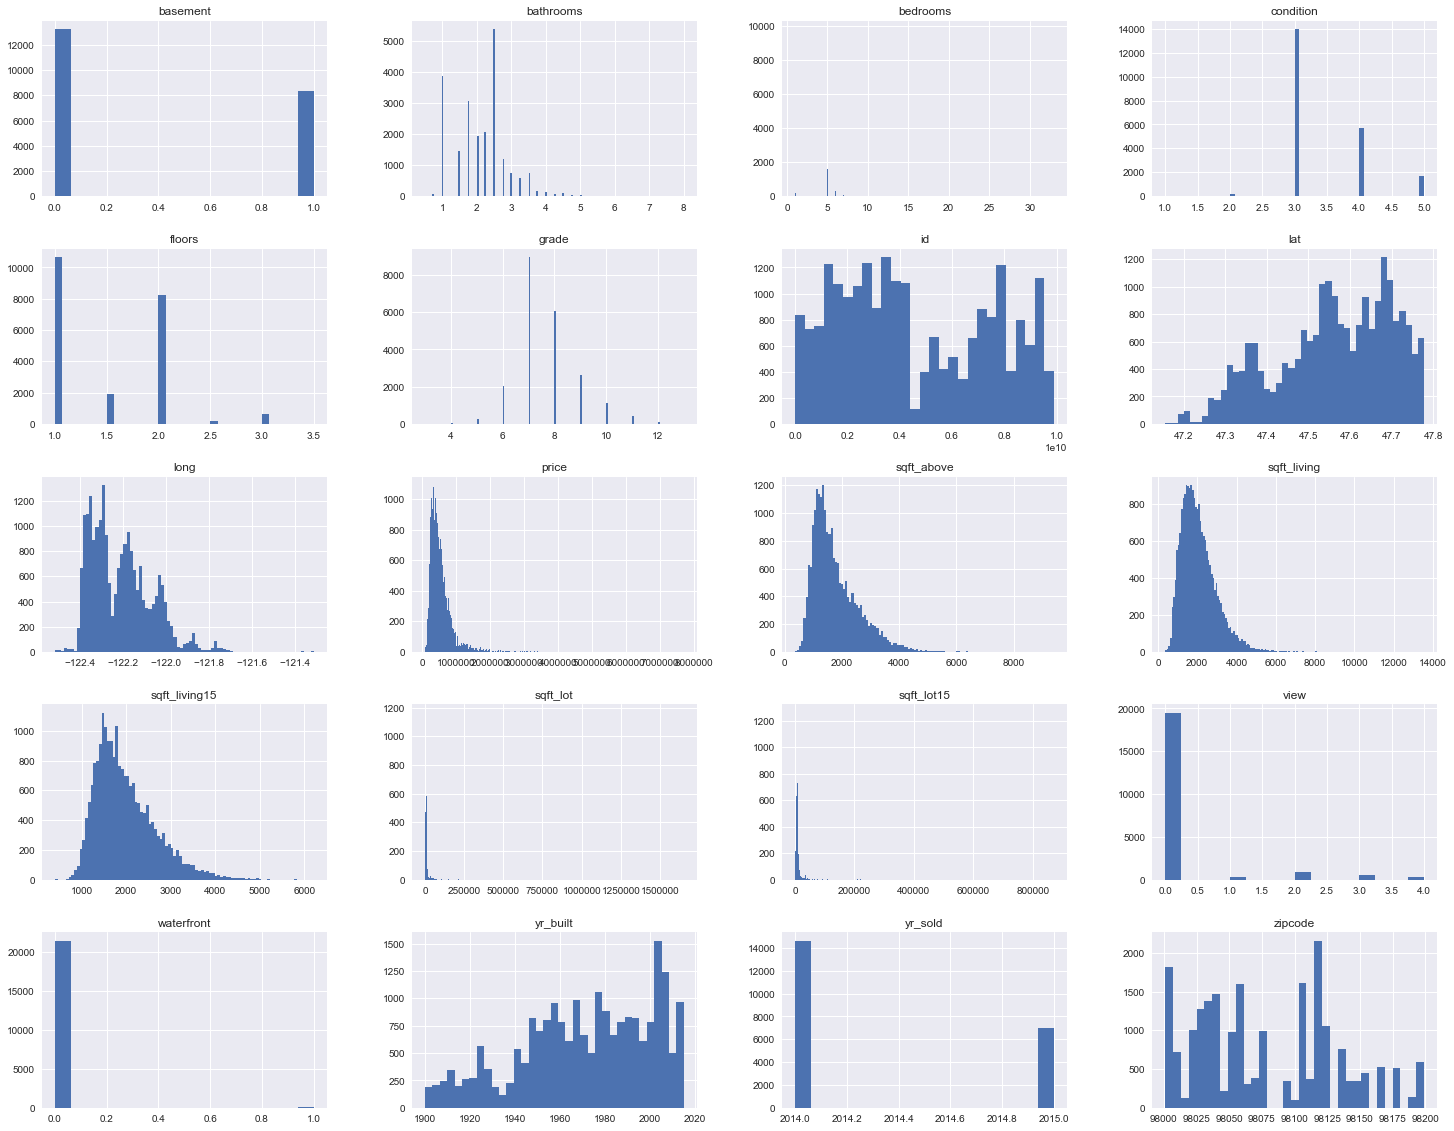

In [19]:
df.hist(figsize=(25,20), bins='auto');

### Checking for outliers 

In [20]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.00000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,0.38510,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,0.48663,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.00000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.00000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.00000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1.00000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,1.00000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


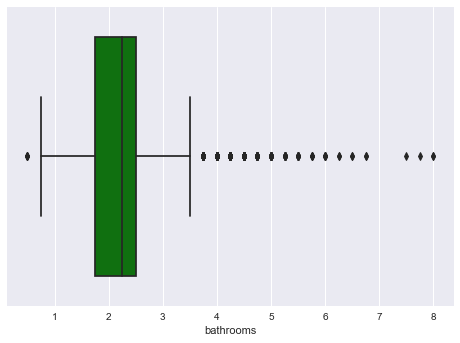

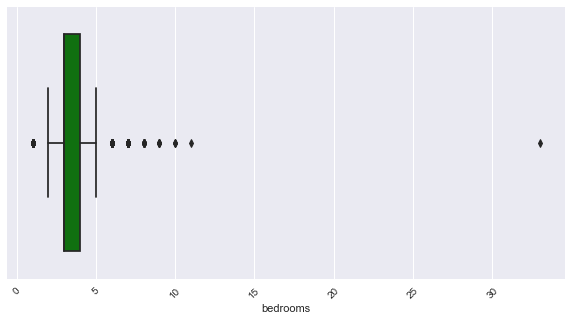

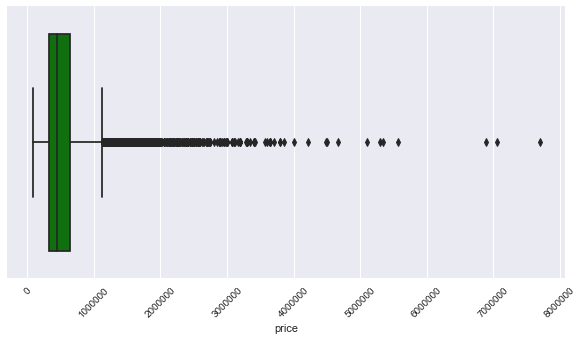

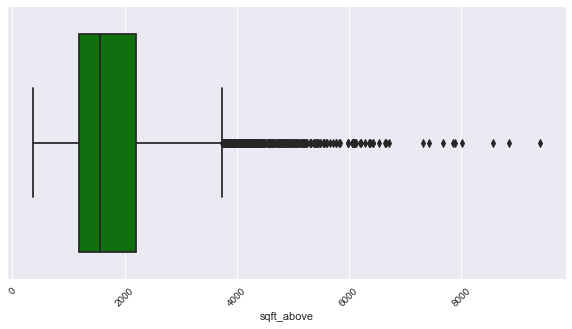

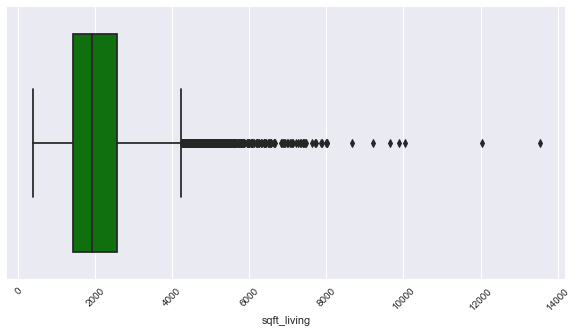

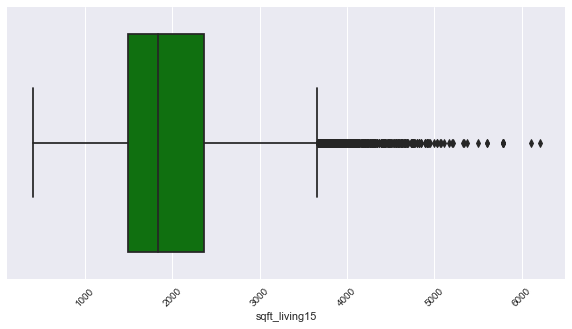

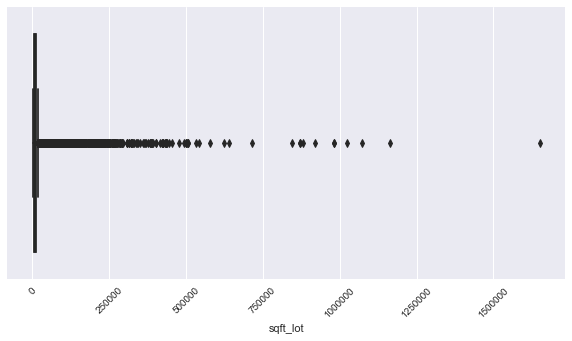

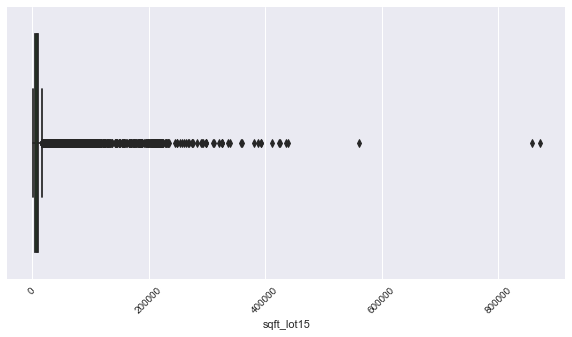

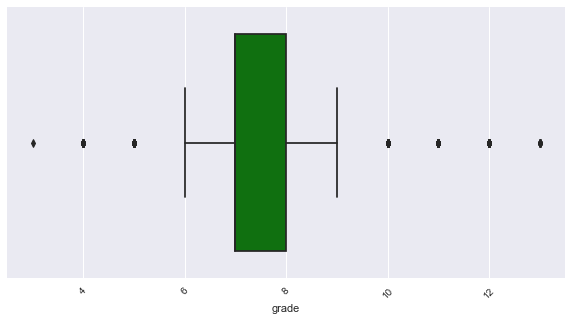

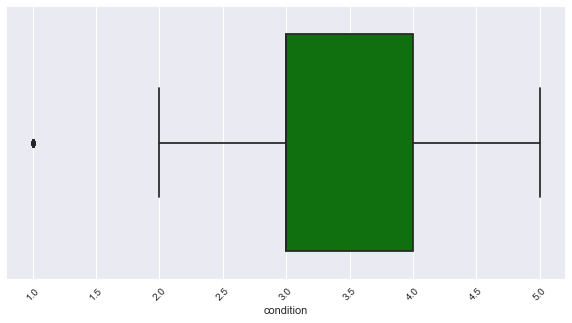

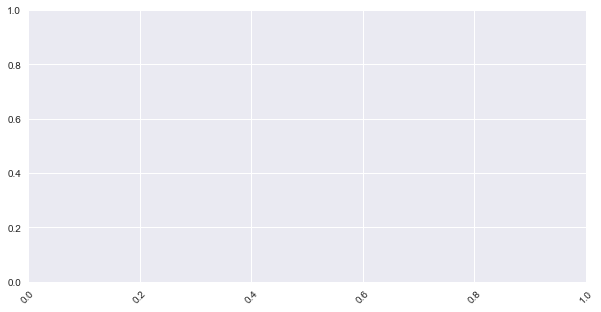

In [21]:
cont = ['bathrooms', 'bedrooms', 'price', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot', 
        'sqft_lot15', 'grade', 'condition']
for col in cont:
    sns.boxplot(x=col, data=df, color='green')
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=45)

There are a lot of unrealistic outliers in the dataset. For instance, the number of bedrooms run to more than 30 bedrooms ot the sale price of the house run to more $8 millions dollars. Therefore, we omit theses outliers for more accurate final results. 

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)

In [23]:
# Replacing the outliers with None
for col in cont:
    df[col] = df[col].map(lambda x: None if x > upper_range[col] else x)
    df[col] = df[col].map(lambda x: None if x < lower_range[col] else x)

# dropping rows with null values
df = df.dropna()

# Checking if the outliers have been dropped
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
count,1.674900e+04,1.674900e+04,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000,16749.000000
mean,4.759231e+09,4.542372e+05,3.276196,1.988969,1850.709893,7082.179055,1.462535,0.001015,0.140964,3.419906,7.406711,1591.440683,0.382650,1969.956953,98081.874918,47.559796,-122.230900,1820.796883,6955.153203,2014.326109
std,2.868026e+09,1.907961e+05,0.779266,0.649552,635.744034,3397.646967,0.543556,0.031844,0.570563,0.646212,0.812617,597.041310,0.486048,29.609992,54.173105,0.139821,0.131475,517.897537,3024.307281,0.468802
min,2.800031e+06,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,0.000000,0.000000,2.000000,6.000000,480.000000,0.000000,1900.000000,98001.000000,47.155900,-122.503000,620.000000,651.000000,2014.000000
25%,2.323059e+09,3.070000e+05,3.000000,1.500000,1370.000000,4773.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1150.000000,0.000000,1950.000000,98033.000000,47.467800,-122.338000,1440.000000,4840.000000,2014.000000
50%,4.060000e+09,4.200000e+05,3.000000,2.000000,1770.000000,7070.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1450.000000,0.000000,1971.000000,98074.000000,47.569600,-122.270000,1730.000000,7200.000000,2014.000000
75%,7.517500e+09,5.650000e+05,4.000000,2.500000,2260.000000,9020.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1920.000000,1.000000,1997.000000,98119.000000,47.681600,-122.155000,2140.000000,8770.000000,2015.000000
max,9.900000e+09,1.120000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,1.000000,4.000000,5.000000,9.000000,3740.000000,1.000000,2015.000000,98199.000000,47.777600,-121.319000,3640.000000,17550.000000,2015.000000


### Check for duplicate values

The 'id' column is the column that supposed to have unique values as it is the unique number to identify each house. Therefore, any existing duplicates in 'id' column are eliminated from the dataset.

In [24]:
len(df[df['id'].duplicated()])

135

In [25]:
df.drop_duplicates(subset='id', inplace=True)

Now that the dataset is cleaned from missing values and duplicated values. We can also drop the 'id' column as it is not beneficial to our models later.

In [26]:
df = df.drop('id', axis=1).copy()
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955,98178,47.5112,-122.257,1340.0,5650.0,2014
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,1.0,1951,98125,47.7210,-122.319,1690.0,7639.0,2014
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933,98028,47.7379,-122.233,2720.0,8062.0,2015
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,1.0,1965,98136,47.5208,-122.393,1360.0,5000.0,2014
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,98074,47.6168,-122.045,1800.0,7503.0,2015


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16614 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16614 non-null  float64
 1   bedrooms       16614 non-null  float64
 2   bathrooms      16614 non-null  float64
 3   sqft_living    16614 non-null  float64
 4   sqft_lot       16614 non-null  float64
 5   floors         16614 non-null  float64
 6   waterfront     16614 non-null  float64
 7   view           16614 non-null  float64
 8   condition      16614 non-null  float64
 9   grade          16614 non-null  float64
 10  sqft_above     16614 non-null  float64
 11  basement       16614 non-null  float64
 12  yr_built       16614 non-null  int64  
 13  zipcode        16614 non-null  int64  
 14  lat            16614 non-null  float64
 15  long           16614 non-null  float64
 16  sqft_living15  16614 non-null  float64
 17  sqft_lot15     16614 non-null  float64
 18  yr_sol

### Deal with categorical data

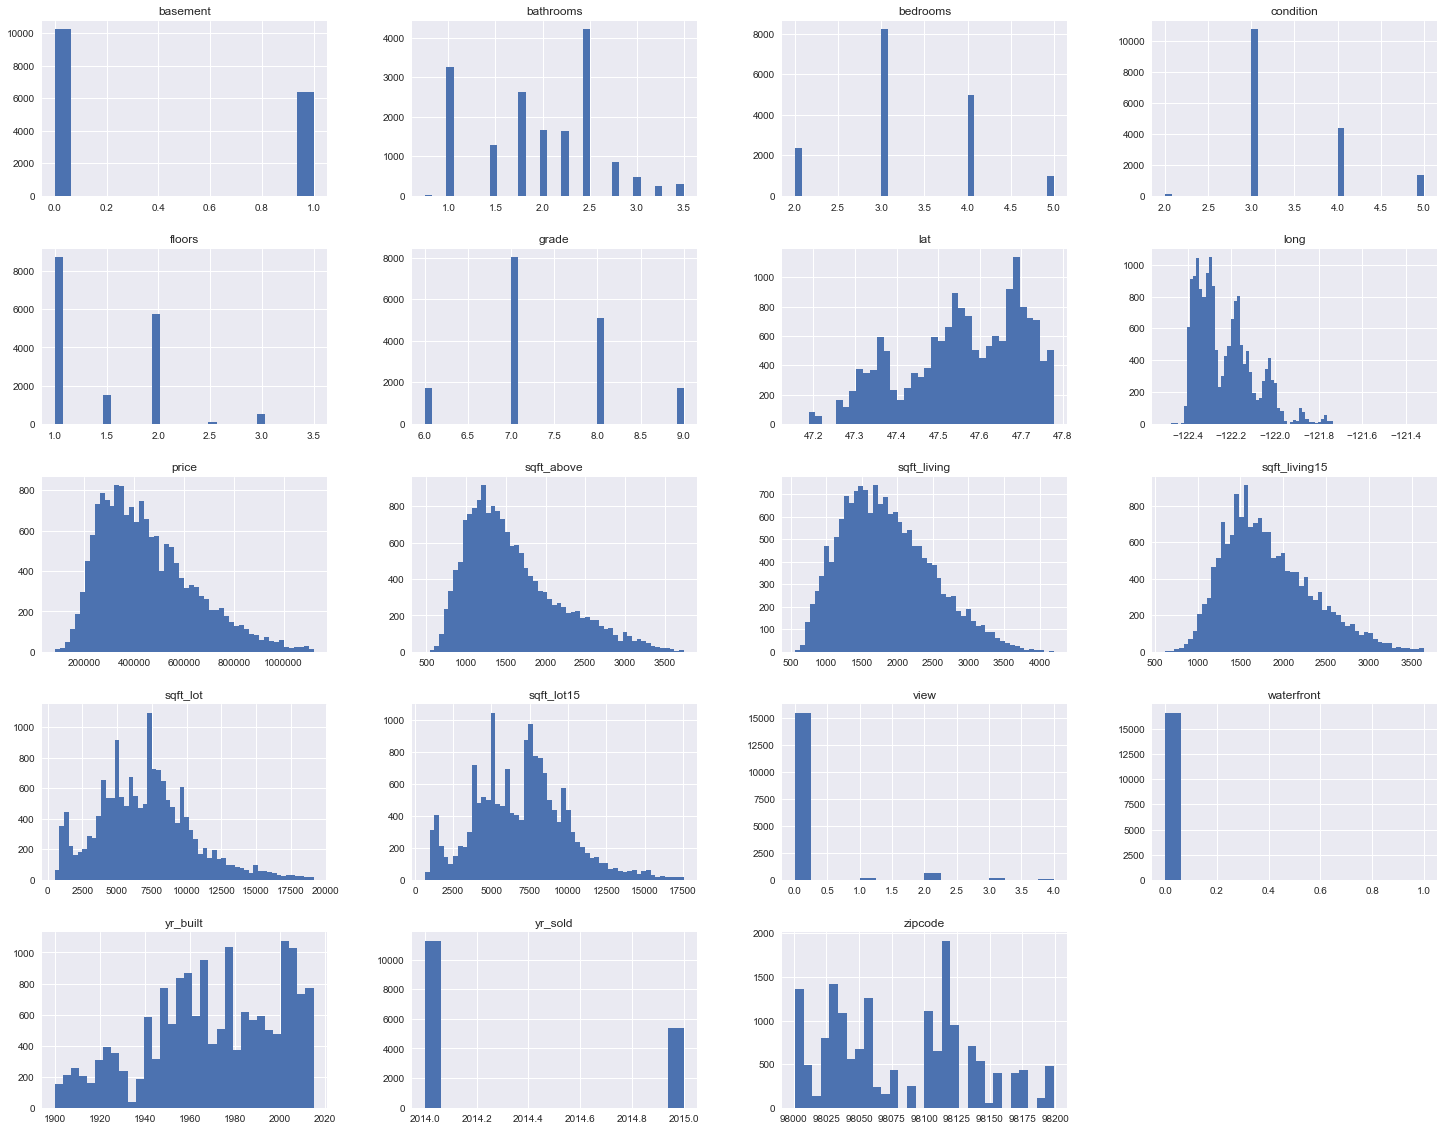

In [28]:
# Plot the dataset again
df.hist(figsize=(25,20), bins='auto');

In [29]:
for column in df.columns:
    print(column, df[column].nunique())

price 3040
bedrooms 4
bathrooms 12
sqft_living 691
sqft_lot 7019
floors 6
waterfront 2
view 5
condition 4
grade 4
sqft_above 655
basement 2
yr_built 116
zipcode 70
lat 4727
long 611
sqft_living15 571
sqft_lot15 6173
yr_sold 2


Based on the histograms and the number of unique values above, the categorical data are bedrooms, bathrooms, floors, waterfront, view, condition, grade, latitude, longitude, and zipcode. However, except for latitude, longitude, and zipcode, other categorical features have numeric data and hierarchical orders. For example, 3 bedrooms ranks higher than 2 bedrooms which ranks higher than 1 bedroom. Therefore, these features can be used in models without having to perform label encoding or creating dummy variables.

For the 'zipcode', it does not have a hierachical order. Therefore, one hot encoding is done in order to include them in the model. However, there are 70 unique zipcodes which are a lot to create addition columns. These 70 zipcodes are placed in 10 different bins and then performing one hot encoding.

In [30]:
#checking the pentiles of zipcode
df['zipcode'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

#creating bins based on the quartiles
bins = [98000, 98008, 98028, 98038, 98053, 98065, 98103, 98115, 98125, 98155, 98200]
bins_cut = pd.cut(df['zipcode'], bins)
bins_cut = bins_cut.cat.as_ordered()
bins_cut.head()

0    (98155, 98200]
1    (98115, 98125]
2    (98008, 98028]
3    (98125, 98155]
4    (98065, 98103]
Name: zipcode, dtype: category
Categories (10, interval[int64]): [(98000, 98008] < (98008, 98028] < (98028, 98038] < (98038, 98053] ... (98103, 98115] < (98115, 98125] < (98125, 98155] < (98155, 98200]]

[Text(0, 0, '(98028, 98038]'),
 Text(0, 0, '(98125, 98155]'),
 Text(0, 0, '(98115, 98125]'),
 Text(0, 0, '(98103, 98115]'),
 Text(0, 0, '(98000, 98008]'),
 Text(0, 0, '(98053, 98065]'),
 Text(0, 0, '(98065, 98103]'),
 Text(0, 0, '(98155, 98200]'),
 Text(0, 0, '(98008, 98028]'),
 Text(0, 0, '(98038, 98053]')]

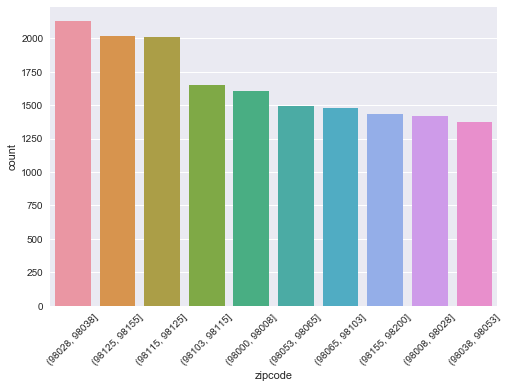

In [31]:
graph = sns.countplot(data=df, x=bins_cut, order=bins_cut.value_counts().index)
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)

In [32]:
# Now, replace the original 'zipcode' column with the created 'bins_cut'
df['zipcode']=bins_cut

# Create dummy variables, dropping one variable to avoid dummy variable trap
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix = 'zip', drop_first=True)

# Then, drop the original 'zipcode' column
df = df.drop('zipcode', axis=1).copy()

# Add the zipcode dummy variables into the existing dataframe
df = pd.concat([df, zipcode_dummies], axis=1).copy()

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_sold,"zip_(98008, 98028]","zip_(98028, 98038]","zip_(98038, 98053]","zip_(98053, 98065]","zip_(98065, 98103]","zip_(98103, 98115]","zip_(98115, 98125]","zip_(98125, 98155]","zip_(98155, 98200]"
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,...,2014,0,0,0,0,0,0,0,0,1
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,...,2014,0,0,0,0,0,0,1,0,0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,...,2015,1,0,0,0,0,0,0,0,0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,...,2014,0,0,0,0,0,0,0,1,0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,...,2015,0,0,0,0,1,0,0,0,0


We also need to change the name of zipcode_dummies columns to avoid errors when doing modeling 

In [33]:
df = df.rename(columns={'zip_(98008, 98028]':'zip_98008_98028', 'zip_(98028, 98038]':'zip_98028_98038',
                        'zip_(98038, 98053]':'zip_98038_98053', 'zip_(98053, 98065]':'zip_98053_98065', 
                        'zip_(98065, 98103]':'zip_98065_98103', 'zip_(98103, 98115]':'zip_98103_98115', 
                        'zip_(98115, 98125]':'zip_98115_98125', 'zip_(98125, 98155]':'zip_98125_98155',
                        'zip_(98155, 98200]':'zip_98155_98200'}).copy()

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_sold,zip_98008_98028,zip_98028_98038,zip_98038_98053,zip_98053_98065,zip_98065_98103,zip_98103_98115,zip_98115_98125,zip_98125_98155,zip_98155_98200
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,...,2014,0,0,0,0,0,0,0,0,1
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,...,2014,0,0,0,0,0,0,1,0,0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,...,2015,1,0,0,0,0,0,0,0,0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,...,2014,0,0,0,0,0,0,0,1,0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,...,2015,0,0,0,0,1,0,0,0,0


The latitude and longitude are also categorical variables with no hierachical order. However, since the zipcode is already "treated", we can used this data to predict the house price for a simpler model. 

In [34]:
# Drop both 'lat' and 'long' columns
df = df.drop(['lat', 'long'], axis=1).copy()

## Check for Multicollinearity of features

Text(0.5, 1, 'Correlation > 0.75')

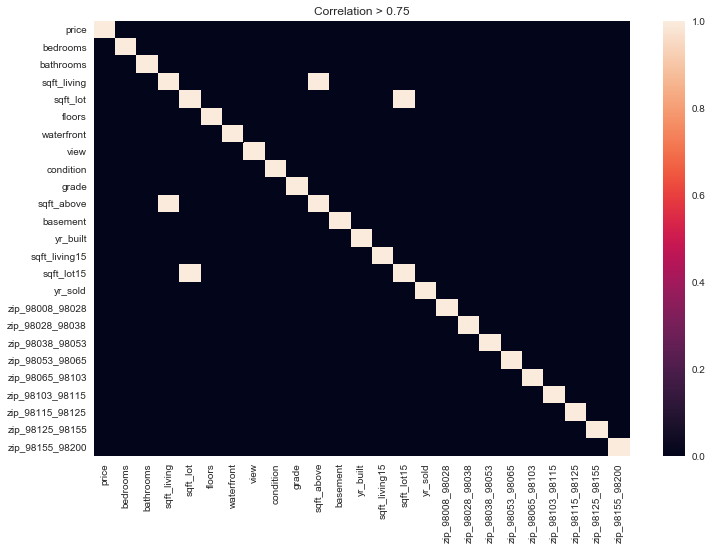

In [35]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr() > 0.75)
plt.title('Correlation > 0.75')

From the heatmap plot above, 'sqft_living' is correlated with 'sqft_above' and 'sqft_lot' is correlated with 'sqft_lot15'.

Plot 'sqft_living', 'sqft_above', 'sqft_lot' and 'sqft_lot15' against the target 'price' to determine which features are highly correlated with the target higher than others. 

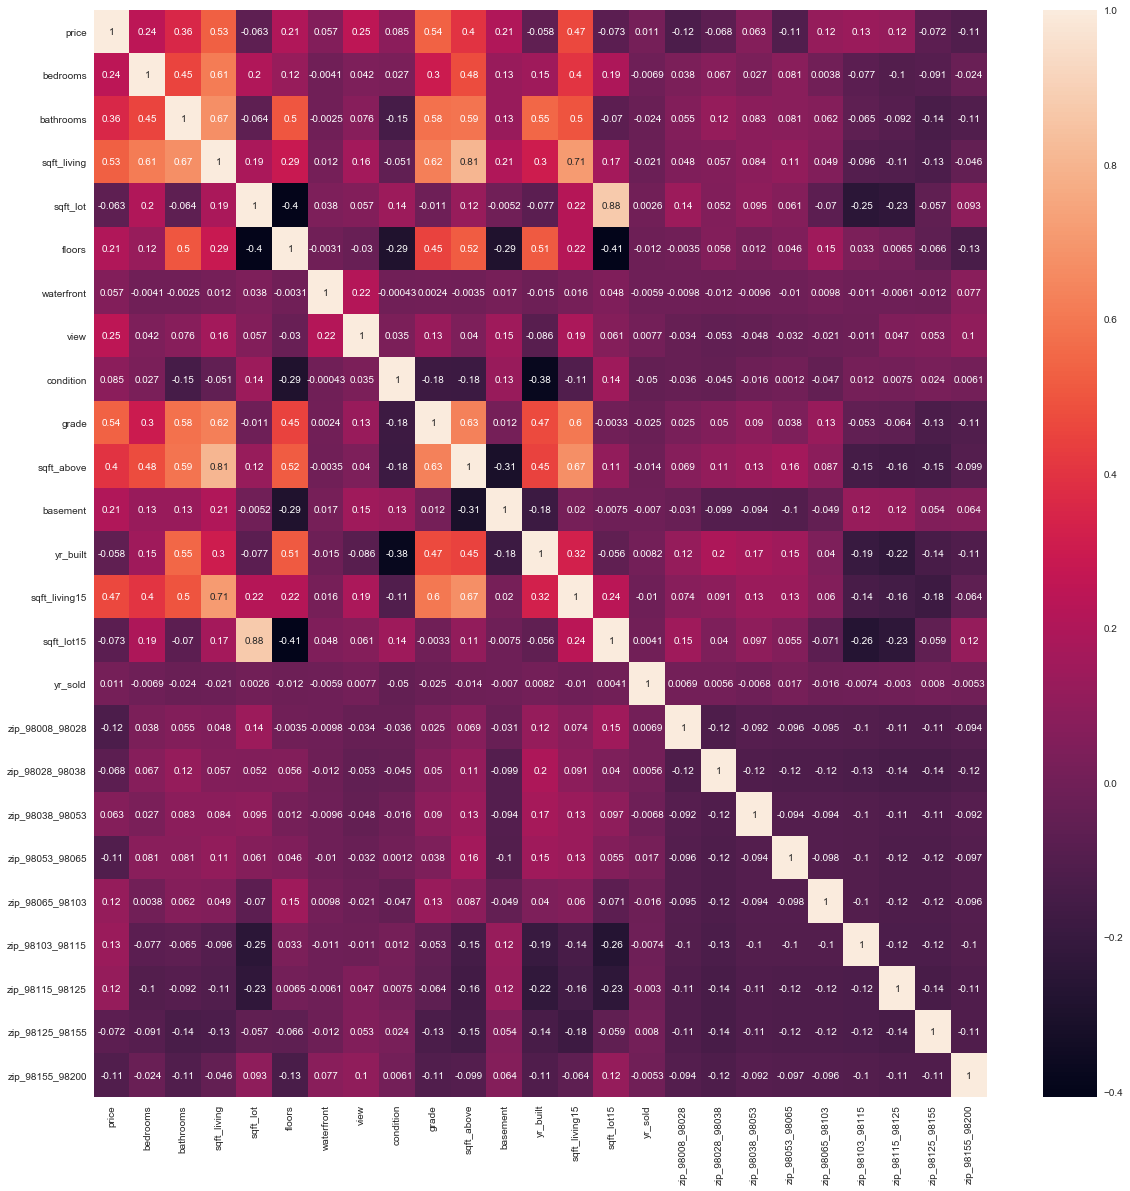

In [36]:
fig2 = plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

Correlation values between: 

Price and 'sqft_living' = 0.53

Price and 'sqft_above' = 0.4

Price and 'sqft_lot' = -0.076

Price and 'sqft_lot15' = -0.085

Based on the correlation values above, we drop the 'sqft_above' and 'sqft_lot15' columns

In [37]:
df = df.drop(['sqft_above', 'sqft_lot15'], axis=1).copy()

## Normalizing the data

We need to convert all of our numeric columns to the same scale by normalizing our dataset. We normalize the data by converting each numeric value to it's corresponding z-score for the column, which is obtained by subtracting the column's mean and then dividing by the column's standard deviation for every value.

'price' is not normalized because this is the feature to be predicted.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16614 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            16614 non-null  float64
 1   bedrooms         16614 non-null  float64
 2   bathrooms        16614 non-null  float64
 3   sqft_living      16614 non-null  float64
 4   sqft_lot         16614 non-null  float64
 5   floors           16614 non-null  float64
 6   waterfront       16614 non-null  float64
 7   view             16614 non-null  float64
 8   condition        16614 non-null  float64
 9   grade            16614 non-null  float64
 10  basement         16614 non-null  float64
 11  yr_built         16614 non-null  int64  
 12  sqft_living15    16614 non-null  float64
 13  yr_sold          16614 non-null  int64  
 14  zip_98008_98028  16614 non-null  uint8  
 15  zip_98028_98038  16614 non-null  uint8  
 16  zip_98038_98053  16614 non-null  uint8  
 17  zip_98053_98

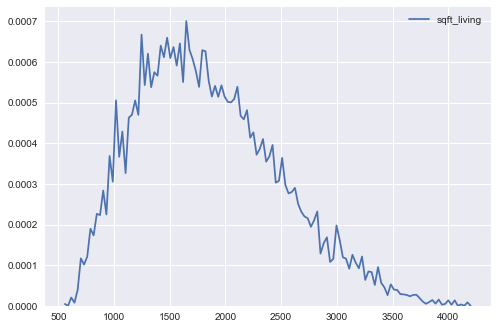

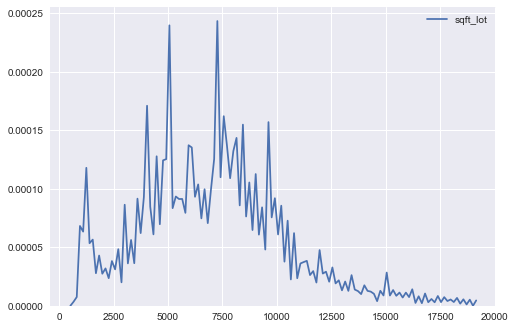

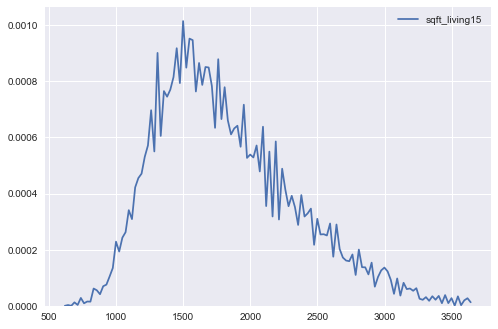

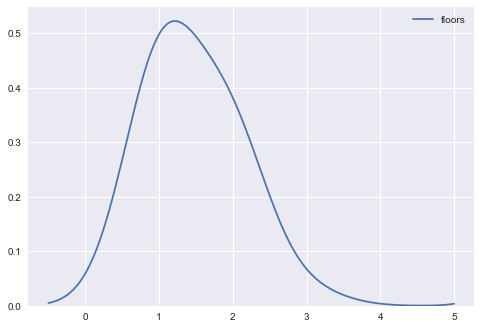

<Figure size 576x396 with 0 Axes>

In [39]:
#Use KDE plots to visualize the distribution of variables 
for feat in ['sqft_living', 'sqft_lot', 'sqft_living15', 'floors']:
    sns.kdeplot(df[feat], bw=0.5)
    plt.figure()

In [40]:
for feat in ['sqft_living', 'sqft_lot', 'sqft_living15', 'floors']:
    df[feat] = df[feat].map(lambda x: np.log(x))
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_sold,zip_98008_98028,zip_98028_98038,zip_98038_98053,zip_98053_98065,zip_98065_98103,zip_98103_98115,zip_98115_98125,zip_98125_98155,zip_98155_98200
count,1.661400e+04,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,...,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000
mean,4.543664e+05,3.276634,1.991197,7.463989,8.718847,0.317036,0.001023,0.141808,3.420429,7.410076,...,2014.322138,0.085410,0.128085,0.082701,0.089804,0.088961,0.099434,0.120802,0.121584,0.086433
std,1.908357e+05,0.779199,0.649283,0.352745,0.599182,0.352743,0.031973,0.572126,0.645974,0.811832,...,0.467310,0.279499,0.334194,0.275439,0.285909,0.284696,0.299253,0.325907,0.326815,0.281011
min,8.200000e+04,2.000000,0.750000,6.327937,6.253829,0.000000,0.000000,0.000000,2.000000,6.000000,...,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.073375e+05,3.000000,1.500000,7.222566,8.468003,0.000000,0.000000,0.000000,3.000000,7.000000,...,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000e+05,3.000000,2.000000,7.484369,8.862484,0.000000,0.000000,0.000000,3.000000,7.000000,...,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.650000e+05,4.000000,2.500000,7.723120,9.106645,0.693147,0.000000,0.000000,4.000000,8.000000,...,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.120000e+06,5.000000,3.500000,8.342840,9.859588,1.252763,1.000000,4.000000,5.000000,9.000000,...,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the KDE plots again for the results after normalizing

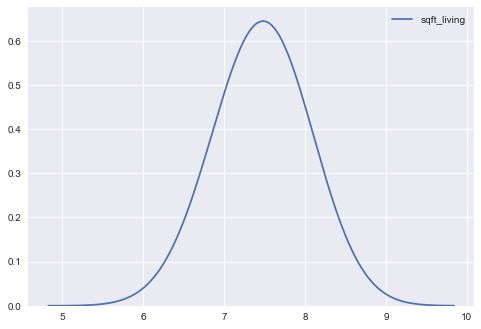

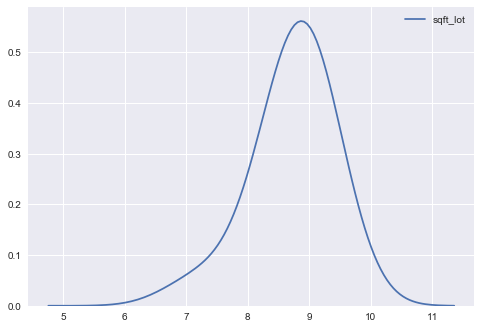

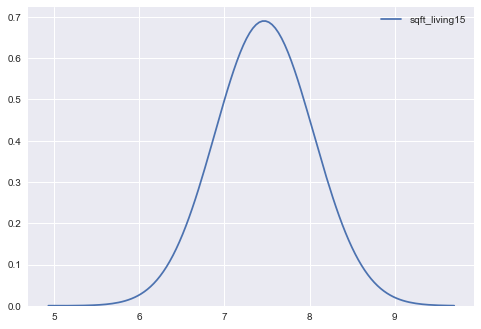

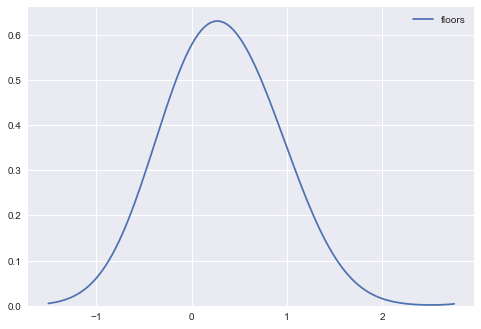

<Figure size 576x396 with 0 Axes>

In [41]:
for feat in ['sqft_living', 'sqft_lot', 'sqft_living15', 'floors']:
    sns.kdeplot(df[feat], bw=0.5)
    plt.figure()

## Scaling the data

Now that the independent variables follow a normal distribution. The next step is equalize their magnitudes by scaling them using min-max scaling method. Only continuous variables are selected for this process

In [42]:
# Define a function for min-max scaling
def scale(column):
    maximum = column.max()
    minimum = column.min()
    y = (column - minimum)/(maximum-minimum)
    return y

scale_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_living15']

for feat in scale_vars:
    df[feat] = scale(df[feat])

In [43]:
# Check to see whether the features have been scaled
df[scale_vars].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_living15
count,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000,16614.000000
mean,0.425545,0.451344,0.563825,0.683634,0.253069,0.035452,0.473476,0.470025,0.586870
std,0.259733,0.236103,0.175068,0.166174,0.281572,0.143031,0.215325,0.270611,0.158154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.272727,0.444006,0.614066,0.000000,0.000000,0.333333,0.333333,0.476085
50%,0.333333,0.454545,0.573939,0.723469,0.000000,0.000000,0.333333,0.333333,0.579743
75%,0.666667,0.636364,0.692432,0.791183,0.553295,0.000000,0.666667,0.666667,0.699903
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Saving the cleaned data to a new CSV file

Save the clean data into 'cleaned_kc_house_data.csv' for later analysis 

In [45]:
df.to_csv('cleaned_kc_house_data.csv')